<a href="https://colab.research.google.com/github/uday899/CreditPathAI/blob/main/creditpathAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/Smart Loan Recovery System.csv')

In [4]:
df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [ ]:
df.isnull().sum()

,0
Borrower_ID,0
Age,0
Gender,0
Employment_Type,0
Monthly_Income,0
Num_Dependents,0
Loan_ID,0
Loan_Amount,0
Loan_Tenure,0
Interest_Rate,0


In [ ]:
rows = df.shape[0]
columns = df.shape[1]

print("Number of rows:", rows)
print("Number of columns:", columns)


Number of rows: 500
Number of columns: 21


In [ ]:
df.info()
#data set structure and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

In [ ]:
df=df.drop(['Borrower_ID', 'Loan_ID'] ,axis=1, errors='ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols].describe()


,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


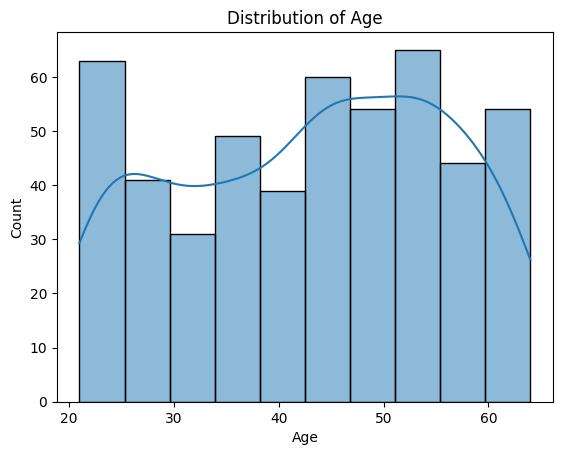

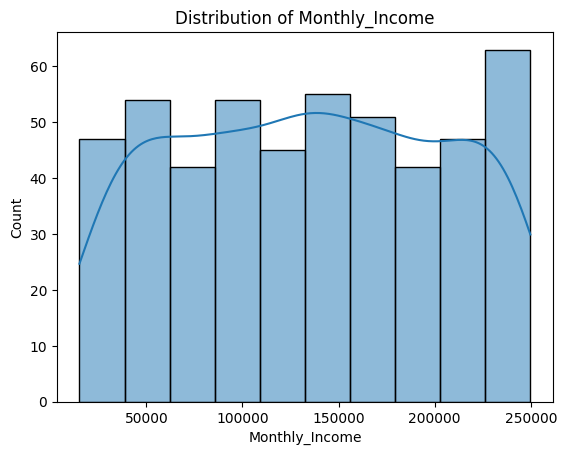

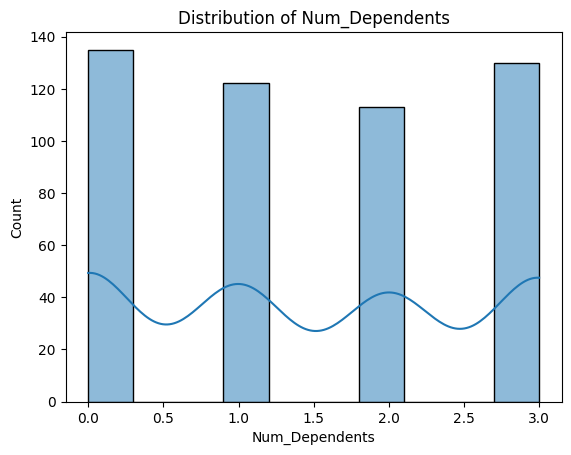

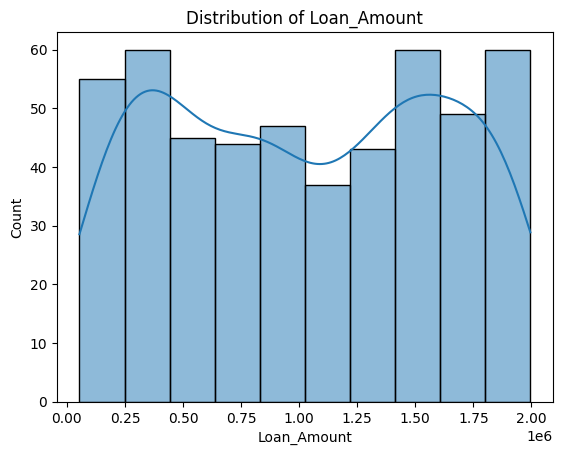

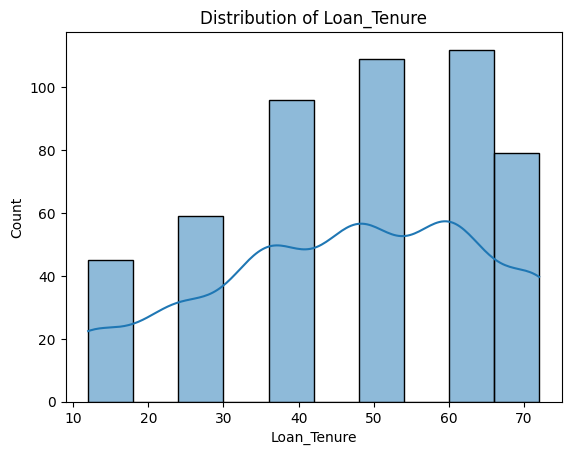

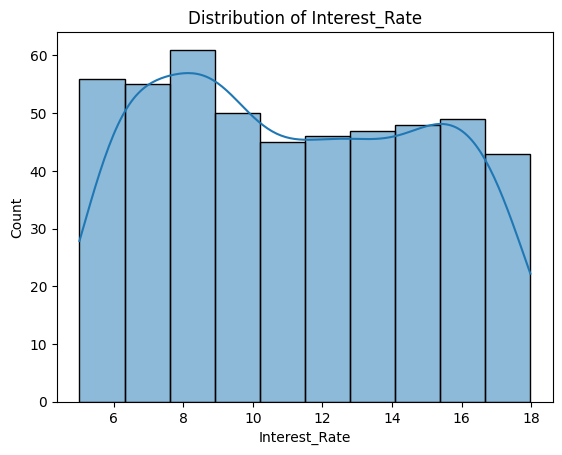

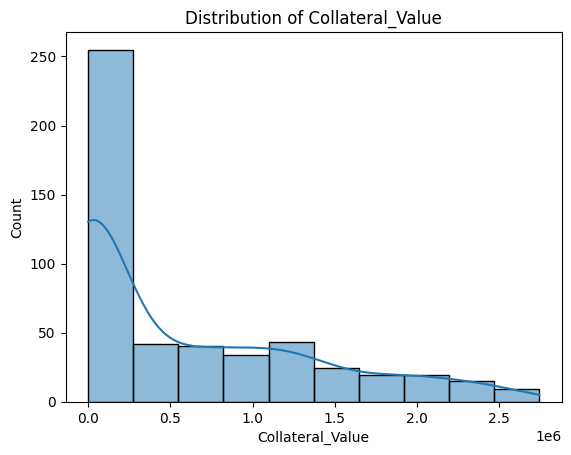

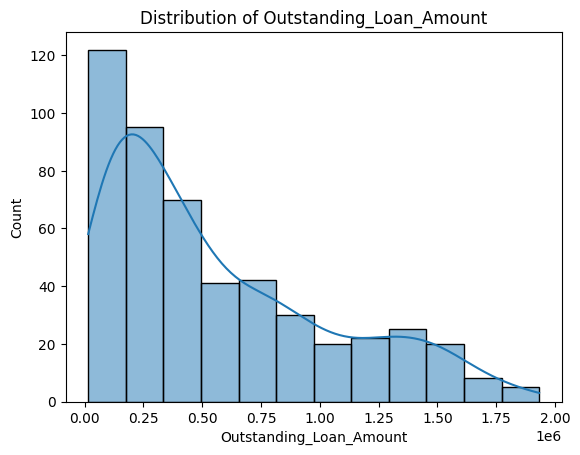

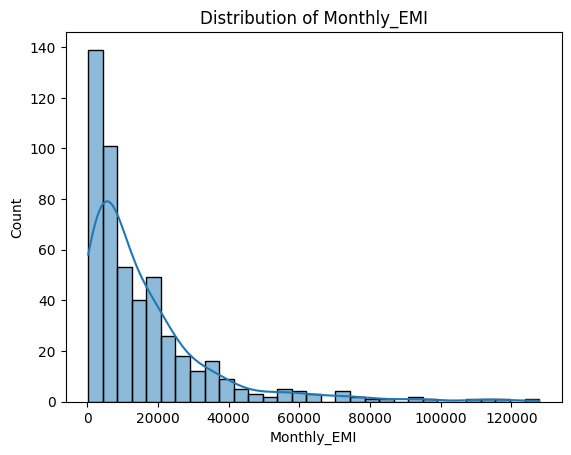

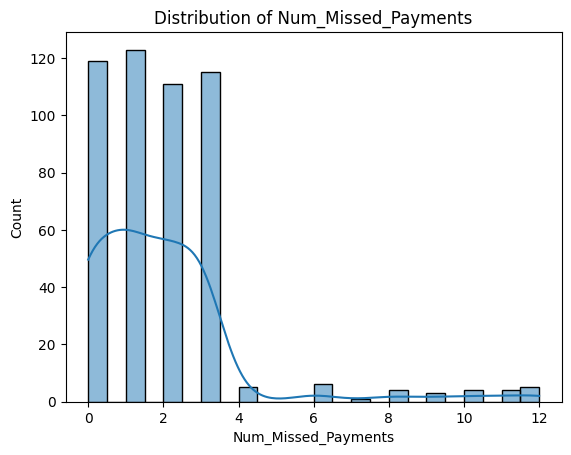

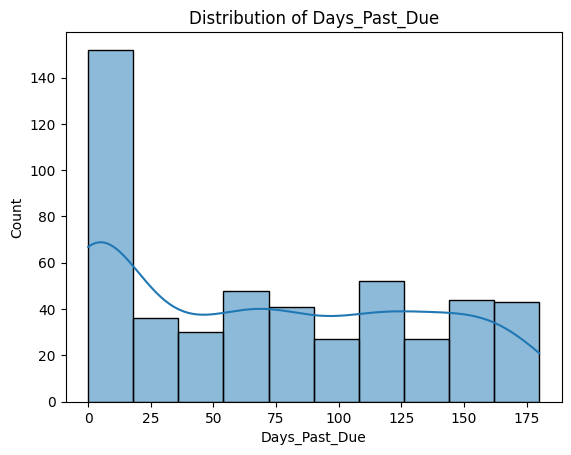

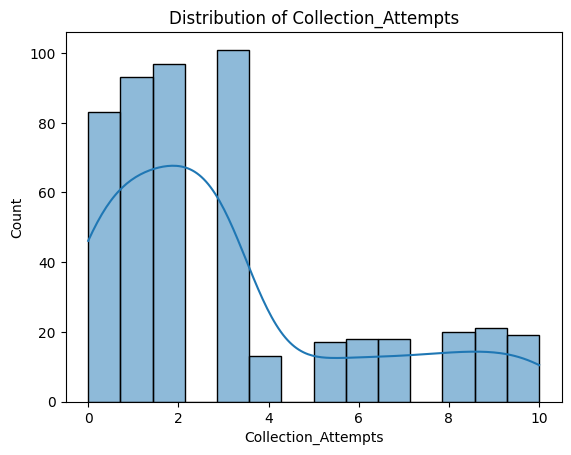

In [ ]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


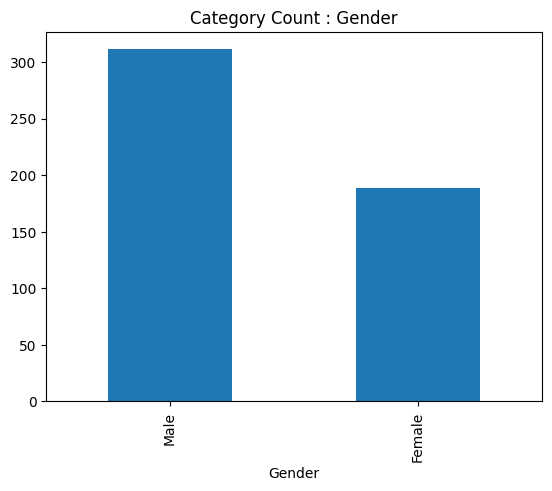

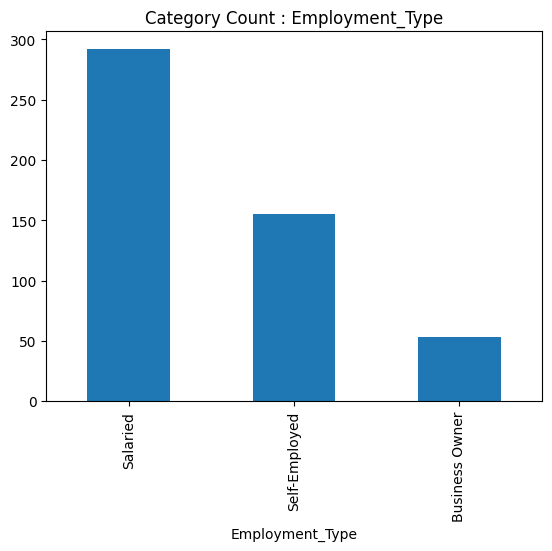

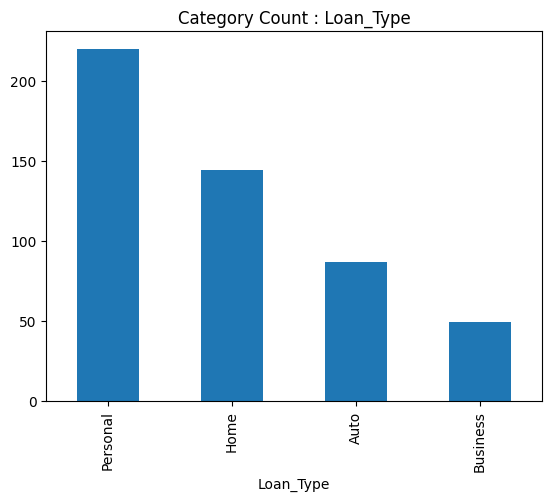

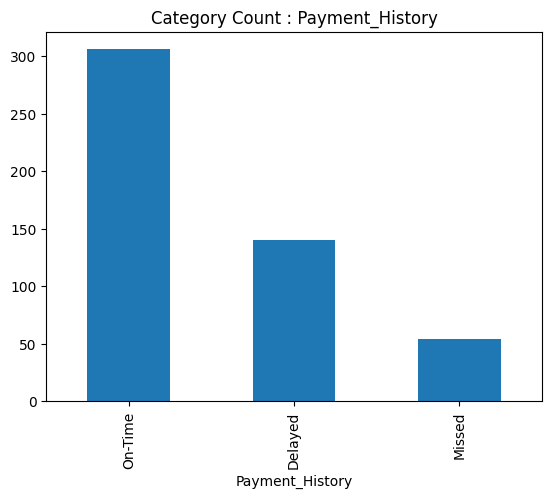

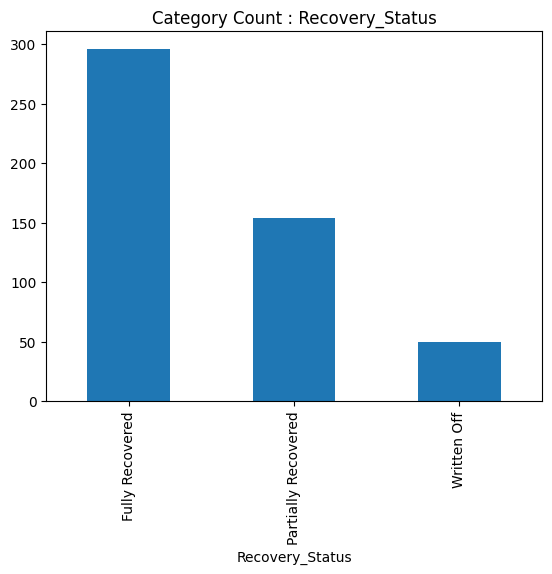

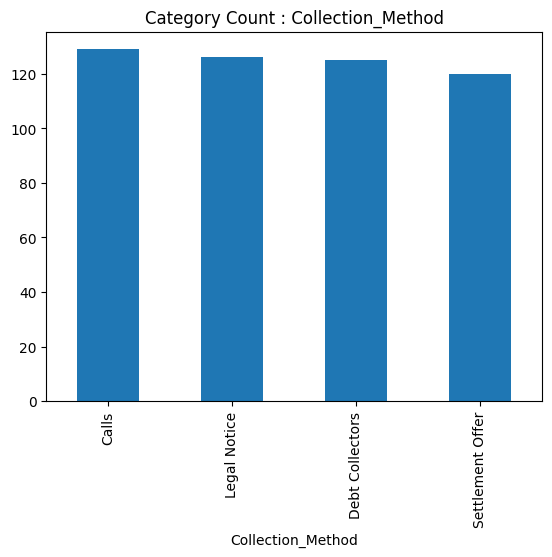

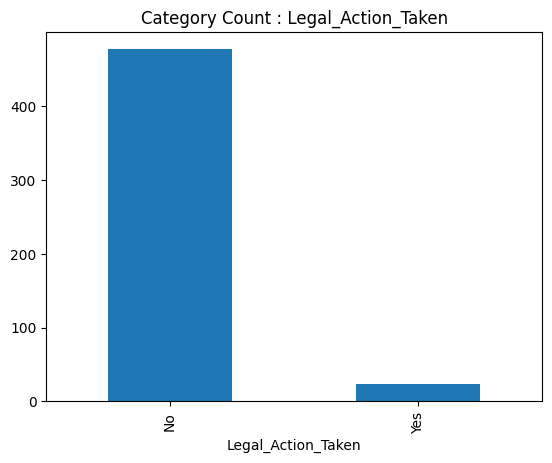

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Category Count : {col}")
    plt.show()


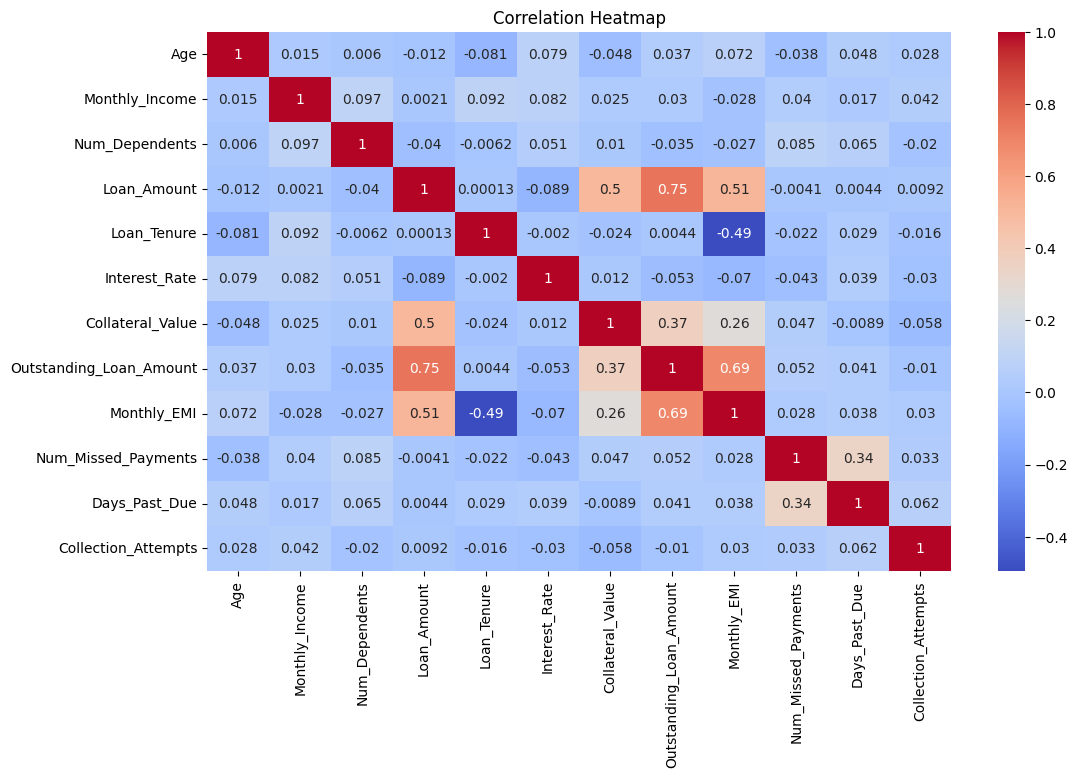

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:

import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install mlflow
import mlflow
import mlflow.sklearn


In [20]:
target_col = "Recovery_Status"

X = df.drop(columns=[target_col])
y = df[target_col]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
categorical_cols = X_train.select_dtypes(include='object').columns

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns - this is crucial to ensure both datasets have the same columns
# and order, especially if some categories are present in one set but not the other.
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [22]:
with mlflow.start_run(run_name="Logistic_Regression"):
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train_scaled, y_train)

    y_pred = lr.predict(X_test_scaled)
    # For multi-class AUC, use probabilities for all classes
    y_prob = lr.predict_proba(X_test_scaled)

    # Calculate multi-class AUC-ROC using 'ovr' strategy and provide class labels
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr', labels=lr.classes_)
    cm = confusion_matrix(y_test, y_pred)

    mlflow.log_metric("AUC_ROC", auc)
    mlflow.sklearn.log_model(lr, "logistic_model")

    print("Logistic Regression AUC:", auc)
    print("Confusion Matrix:\n", cm)


2025/12/25 07:20:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic Regression AUC: 0.7044717515090619
Confusion Matrix:
 [[55  4  0]
 [24  7  0]
 [ 5  5  0]]


In [24]:
from sklearn.preprocessing import LabelEncoder

with mlflow.start_run(run_name="XGBoost"):
    # Encode target labels
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    xgb = XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        eval_metric="mlogloss", # Use mlogloss for multi-class classification
        use_label_encoder=False # Suppress warning about future deprecation
    )
    # Use the one-hot encoded X_train and X_test from previous preprocessing step
    xgb.fit(X_train_encoded, y_train_encoded)

    # Predict probabilities for all classes
    y_prob = xgb.predict_proba(X_test_encoded)
    # Predict class labels (these will be encoded integers)
    y_pred_encoded = xgb.predict(X_test_encoded)

    # Calculate multi-class AUC-ROC using 'ovr' strategy
    auc = roc_auc_score(y_test_encoded, y_prob, multi_class='ovr')
    # Confusion matrix using encoded labels
    cm = confusion_matrix(y_test_encoded, y_pred_encoded)

    mlflow.log_metric("AUC_ROC", auc)
    mlflow.sklearn.log_model(xgb, "xgboost_model")

    print("XGBoost AUC:", auc)
    print("Confusion Matrix:\n", cm)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:22:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/12/25 07:22:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


XGBoost AUC: 0.8311133347330019
Confusion Matrix:
 [[57  2  0]
 [10 19  2]
 [ 2  2  6]]


In [27]:
with mlflow.start_run(run_name="LightGBM"):
    lgbm = LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6
    )
    # Use the one-hot encoded X_train and X_test
    # Also use the encoded y_train and y_test for multi-class classification
    lgbm.fit(X_train_encoded, y_train_encoded)

    # Predict probabilities for all classes
    y_prob = lgbm.predict_proba(X_test_encoded)
    # Predict class labels (these will be encoded integers)
    y_pred_encoded = lgbm.predict(X_test_encoded)

    # Calculate multi-class AUC-ROC using 'ovr' strategy
    auc = roc_auc_score(y_test_encoded, y_prob, multi_class='ovr')
    # Confusion matrix using encoded labels
    cm = confusion_matrix(y_test_encoded, y_pred_encoded)

    mlflow.log_metric("AUC_ROC", auc)
    mlflow.sklearn.log_model(lgbm, "lightgbm_model")

    print("LightGBM AUC:", auc)
    print("Confusion Matrix:\n", cm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 23
[LightGBM] [Info] Start training from score -0.523404
[LightGBM] [Info] Start training from score -1.179280
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

2025/12/25 07:24:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LightGBM AUC: 0.7918728649176652
Confusion Matrix:
 [[57  2  0]
 [11 17  3]
 [ 2  7  1]]


In [29]:
results = {
    "Model": ["Logistic Regression", "XGBoost", "LightGBM"],
    "AUC_ROC": [
        roc_auc_score(y_test_encoded, lr.predict_proba(X_test_scaled), multi_class='ovr'),
        roc_auc_score(y_test_encoded, xgb.predict_proba(X_test_encoded), multi_class='ovr'),
        roc_auc_score(y_test_encoded, lgbm.predict_proba(X_test_encoded), multi_class='ovr')
    ]
}

pd.DataFrame(results)

,Model,AUC_ROC
0,Logistic Regression,0.704472
1,XGBoost,0.831113
2,LightGBM,0.791873
